In [35]:
# Dependencies and Setup

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import os
import time
from pprint import pprint
from config import gkey
%matplotlib inline
from citipy import citipy

output_data_file = "./cities.csv"

lat_range = (-90, 90)
lng_range = (-180, 180)



In [36]:
url = "http://api.openweathermap.org/data/2.5/weather?"
list_data = []
dict_data ={}
for city in cities:
    query_url = url + "appid=" + gkey + "&q=" + city
    data = requests.get(query_url).json()
    try:

        dict_data = {"City":data["name"],
                     "Country":data["sys"]["country"],
                     "Date":data["dt"],
                     "Latitude":data["coord"]["lat"],
                    "Longitude":data["coord"]["lon"],
                    "Max Temperature":data["main"]["temp_max"],
                    "Humidity":data["main"]["humidity"],
                    "Cloudiness":data["clouds"]["all"],
                    "Wind Speed":data["wind"]["speed"]}
        list_data.append(dict_data)
    except KeyError:
        print("City does not exists in openweathermap api")

City does not exists in openweathermap api
City does not exists in openweathermap api
City does not exists in openweathermap api
City does not exists in openweathermap api
City does not exists in openweathermap api
City does not exists in openweathermap api
City does not exists in openweathermap api
City does not exists in openweathermap api
City does not exists in openweathermap api
City does not exists in openweathermap api
City does not exists in openweathermap api
City does not exists in openweathermap api
City does not exists in openweathermap api
City does not exists in openweathermap api
City does not exists in openweathermap api
City does not exists in openweathermap api
City does not exists in openweathermap api
City does not exists in openweathermap api
City does not exists in openweathermap api
City does not exists in openweathermap api
City does not exists in openweathermap api
City does not exists in openweathermap api
City does not exists in openweathermap api
City does n

In [37]:
lat_lngs = []
cities = []
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
   
    if city not in cities:
        cities.append(city)

len(cities)

603

In [38]:
df_data = pd.DataFrame(list_data)
df_data.to_csv(output_data_file,index=False)
df_data.info()
df_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 533 entries, 0 to 532
Data columns (total 9 columns):
City               533 non-null object
Cloudiness         533 non-null int64
Country            533 non-null object
Date               533 non-null int64
Humidity           533 non-null int64
Latitude           533 non-null float64
Longitude          533 non-null float64
Max Temperature    533 non-null float64
Wind Speed         533 non-null float64
dtypes: float64(4), int64(3), object(2)
memory usage: 37.6+ KB


,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temperature,Wind Speed
0,Mayumba,92,GA,1547346006,99,-3.44,10.65,299.372,2.16
1,Sistranda,92,NO,1547346006,100,63.73,8.83,278.172,10.61
2,Lorengau,76,PG,1547345831,99,-2.02,147.27,301.722,6.01
3,Mar del Plata,0,AR,1547345811,48,-46.43,-67.52,286.472,2.68
4,Suntar,48,RU,1547346006,77,62.16,117.65,248.622,1.96


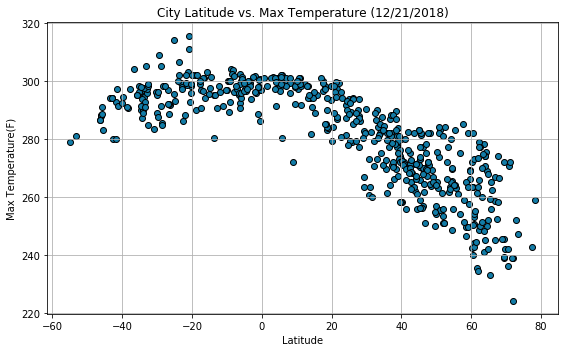

In [39]:
fig , ax = plt.subplots(nrows=1, ncols=1,figsize=(8,5))
ax.scatter(df_data["Latitude"],df_data["Max Temperature"] , marker="o", facecolor='#127ca7',color='black')
ax.set_title("City Latitude vs. Max Temperature (12/21/2018)")
ax.set_xlabel("Latitude")
ax.set_ylabel("Max Temperature(F)")
ax.grid()
fig.tight_layout()
fig.show
plt.savefig("latitude_vs_temperature.png",dpi=600)

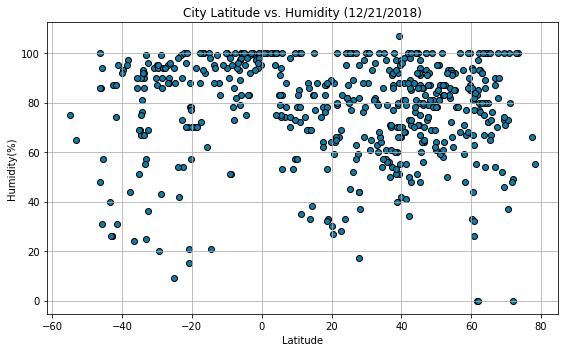

In [40]:
fig , ax = plt.subplots(nrows=1, ncols=1,figsize=(8,5))
ax.scatter(df_data["Latitude"],df_data["Humidity"] , marker="o", facecolor='#127ca7',color='black')
ax.set_title("City Latitude vs. Humidity (12/21/2018)")
ax.set_xlabel("Latitude")
ax.set_ylabel("Humidity(%)")
ax.grid()
fig.tight_layout()
fig.show
plt.savefig("latitude_vs_humidity.png",dpi=600)

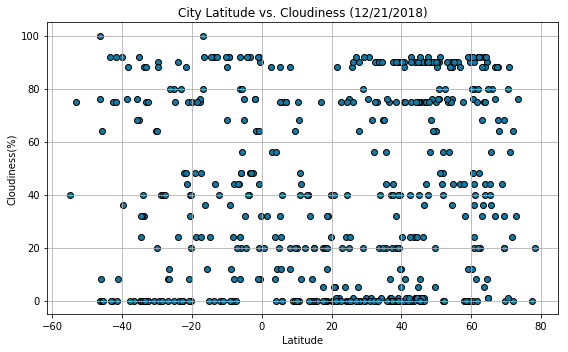

In [41]:
fig , ax = plt.subplots(nrows=1, ncols=1,figsize=(8,5))
ax.scatter(df_data["Latitude"],df_data["Cloudiness"] , marker="o", facecolor='#127ca7',color='black')
ax.set_title("City Latitude vs. Cloudiness (12/21/2018)")
ax.set_xlabel("Latitude")
ax.set_ylabel("Cloudiness(%)")
ax.grid()
fig.tight_layout()
fig.show
plt.savefig("latitude_vs_cloudiness.png",dpi=600)

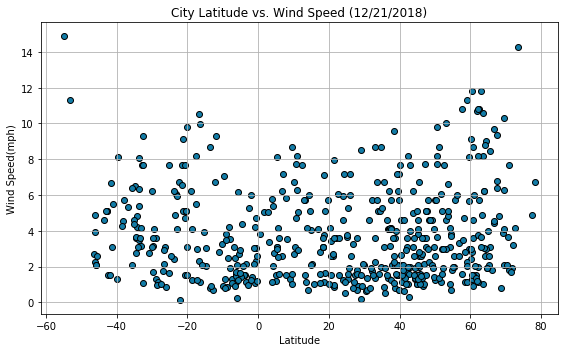

In [42]:
fig , ax = plt.subplots(nrows=1, ncols=1,figsize=(8,5))
ax.scatter(df_data["Latitude"],df_data["Wind Speed"] , marker="o", facecolor='#127ca7',color='black')
ax.set_title("City Latitude vs. Wind Speed (12/21/2018)")
ax.set_xlabel("Latitude")
ax.set_ylabel("Wind Speed(mph)")
ax.grid()
fig.tight_layout()
fig.show
plt.savefig("latitude_vs_windspeed.png",dpi=600)